In [1]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# read data
df = pd.read_csv('./usa_00002.csv.gz', compression = "gzip")
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,GRADEATT,GRADEATTD,EMPSTAT,EMPSTATD,IND,INCTOT
0,2008,200801,1,23,57.0,2008000000011,130001,1,1,55.0,11,114,0,0,1,10,7870,58100
1,2008,200801,1,23,57.0,2008000000011,130001,1,2,49.0,10,101,0,0,3,30,0,0
2,2008,200801,1,23,57.0,2008000000011,130001,1,3,52.0,1,16,3,34,0,0,0,9999999
3,2008,200801,1,23,57.0,2008000000011,130001,1,4,52.0,1,12,2,20,0,0,0,9999999
4,2008,200801,2,39,113.0,2008000000021,90101,1,1,109.0,11,114,0,0,1,10,6870,75000


In [4]:
df_ind = pd.read_csv('./2017-industry-code-list.csv')
df_ind = df_ind.drop(['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 4'], axis=1)
df_ind = df_ind.dropna()

df_ind = df_ind.rename(columns={'2017 Industry Code List': 'IND_NAME', 'Unnamed: 3':'IND'})

df['IND'] = df['IND'].astype(str)
df_ind.head()

df = pd.merge(df, df_ind, on='IND', how='left')
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,GRADEATT,GRADEATTD,EMPSTAT,EMPSTATD,IND,INCTOT,IND_NAME
0,2008,200801,1,23,57.0,2008000000011,130001,1,1,55.0,11,114,0,0,1,10,7870,58100,"Colleges, universities, and professional schoo..."
1,2008,200801,1,23,57.0,2008000000011,130001,1,2,49.0,10,101,0,0,3,30,0,0,NaN
2,2008,200801,1,23,57.0,2008000000011,130001,1,3,52.0,1,16,3,34,0,0,0,9999999,NaN
3,2008,200801,1,23,57.0,2008000000011,130001,1,4,52.0,1,12,2,20,0,0,0,9999999,NaN
4,2008,200801,2,39,113.0,2008000000021,90101,1,1,109.0,11,114,0,0,1,10,6870,75000,Banking and related activities


In [5]:
# drop data with Industry code 0 
index = df[df['IND'].isin([0, 9920])].index
df = df.drop(index)

In [16]:
industry_dict = {}
for i in range(9891):
    if 10 <= i <= 560:
        industry_dict[i] = "Agriculture, Forestry, Fishing and Hunting, and Mining"
    elif 770 <= i <= 1060:
        industry_dict[i] = "Construction"
    elif 1070 <= i <= 4060:
        industry_dict[i] = "Manufacturing"
    elif 4070 <= i <= 4660:
        industry_dict[i] = "Wholesale Trade"
    elif 4670 <= i <= 6060:
        industry_dict[i] = "Retail Trade"
    elif (6070 <= i <= 6460) or (570 <= i <= 760):
        industry_dict[i] = "Transportation and Warehousing, and Utilities"
    elif 6470 <= i <= 6860:
        industry_dict[i] = "Information"
    elif 6870 <= i <= 7260:
        industry_dict[i] = "Finance and Insurance, and Real Estate and Rental and Leasing"
    elif 7270 <= i <= 7790:
        industry_dict[i] = "Professional, Scientific, and Management, and Administrative and Waste Management Services"
    elif 7860 <= i <= 8490:
        industry_dict[i] = "Educational Services, and Health Care and Social Assistance"
    elif 8560 <= i <= 8690:
        industry_dict[i] = "Arts, Entertainment, and Recreation, and Accommodation and Food Services"
    elif 8770 <= i <= 9290:
        industry_dict[i] = "Other Services (except Public Administration)"
    elif 9370 <= i <= 9590:
        industry_dict[i] = "Public Administration"
    elif 9670 <= i <= 9890:
        industry_dict[i] = "Military"
    else:
        industry_dict[i] = None

In [20]:
df['IND'] = df['IND'].astype(int)
df['Industry'] = df['IND'].map(industry_dict)

In [21]:
df.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,GRADEATT,GRADEATTD,EMPSTAT,EMPSTATD,IND,INCTOT,IND_NAME,Industry
0,2008,200801,1,23,57.0,2008000000011,130001,1,1,55.0,11,114,0,0,1,10,7870,58100,"Colleges, universities, and professional schoo...","Educational Services, and Health Care and Soci..."
1,2008,200801,1,23,57.0,2008000000011,130001,1,2,49.0,10,101,0,0,3,30,0,0,NaN,None
2,2008,200801,1,23,57.0,2008000000011,130001,1,3,52.0,1,16,3,34,0,0,0,9999999,NaN,None
3,2008,200801,1,23,57.0,2008000000011,130001,1,4,52.0,1,12,2,20,0,0,0,9999999,NaN,None
4,2008,200801,2,39,113.0,2008000000021,90101,1,1,109.0,11,114,0,0,1,10,6870,75000,Banking and related activities,"Finance and Insurance, and Real Estate and Ren..."


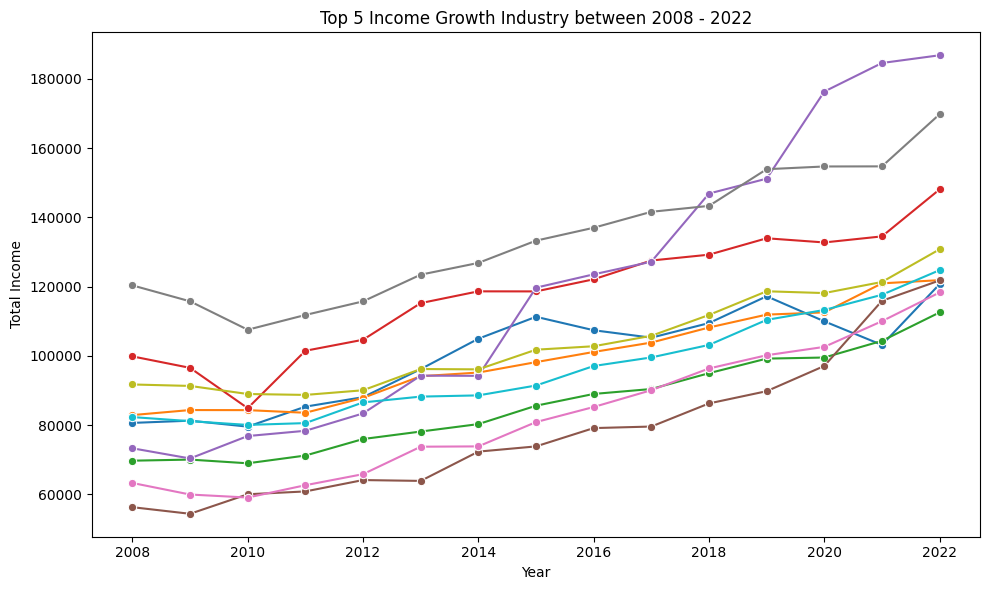

In [32]:
# plot top 10 jobs with highest growth income rate

industry_income = df.groupby(['YEAR', 'IND']).agg({'INCTOT': 'mean'}).reset_index()
pivot_df = industry_income.pivot(index='IND', columns='YEAR', values='INCTOT')
pivot_df['diff'] = (pivot_df[2022] - pivot_df[2008])

top_industries = pivot_df.sort_values(by='diff', ascending=False).head(10).index
new_df = df[df['IND'].isin(top_industries)]

plot_data = new_df.groupby(['YEAR', 'IND', 'IND_NAME']).agg({'INCTOT': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='YEAR', y='INCTOT', hue='IND_NAME', palette='tab10', marker="o")
plt.title('Top 5 Income Growth Industry between 2008 - 2022')
plt.xlabel('Year')
plt.ylabel('Total Income')
plt.legend(title='Industry', bbox_to_anchor=(1, 1.05), loc='best')
plt.legend().set_visible(False)
plt.tight_layout()
plt.show() 


In [34]:
new_plot_data= plot_data[plot_data['YEAR'].isin([2008, 2022])]
new_plot_data.head(20)

,YEAR,IND,IND_NAME,INCTOT
0,2008,370,Oil and gas extraction,80669.184659
1,2008,2190,Pharmaceutical and medicine manufacturing,82927.713701
2,2008,3390,Electronic component and product manufacturing...,69758.132388
3,2008,6490,Software publishers,99882.570536
4,2008,6672,Internet publishing and broadcasting and web s...,73341.066667
5,2008,6695,"Data processing, hosting, and related services",56330.373173
6,2008,6890,Nondepository credit and related activities,63323.443735
7,2008,6970,"Securities, commodities, funds, trusts, and ot...",120386.838967
8,2008,7270,Legal services,91770.349493
9,2008,7380,Computer systems design and related services,82353.408433


In [ ]:
# plot top 10 jobs with highest growth income rate

industry_income = df.groupby(['YEAR', 'Industry']).agg({'INCTOT': 'mean'}).reset_index()
pivot_df = industry_income.pivot(index='Industry', columns='YEAR', values='INCTOT')
pivot_df['diff'] = (pivot_df[2022] - pivot_df[2008])

top_industries = pivot_df.sort_values(by='diff', ascending=False).head(5).index
new_df = df[df['Industry'].isin(top_industries)]

plot_data = new_df.groupby(['YEAR', 'Industry']).agg({'INCTOT': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='YEAR', y='INCTOT', hue='Industry', palette='tab10', marker="o")
plt.title('Top 5 Income Growth')
plt.xlabel('Year')
plt.ylabel('Total Income')
plt.legend(title='Industry', bbox_to_anchor=(1, 1.05), loc='best')
# plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

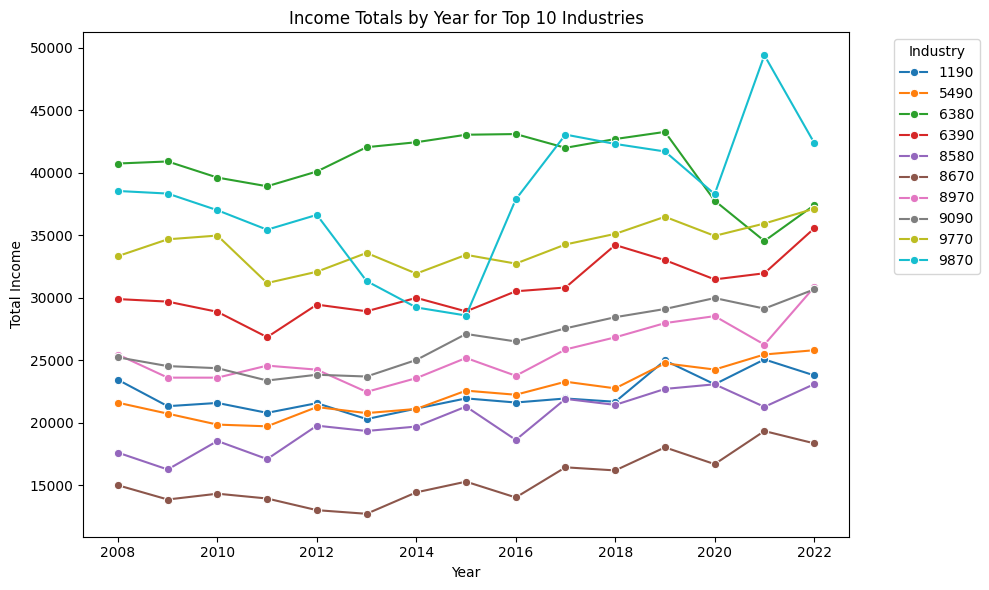

In [32]:
# plot top 10 jobs with highest growth income rate

industry_income = df.groupby(['YEAR', 'IND']).agg({'INCTOT': 'mean'}).reset_index()
pivot_df = industry_income.pivot(index='IND', columns='YEAR', values='INCTOT')
pivot_df['diff'] = (pivot_df[2022] - pivot_df[2008])

top_industries = pivot_df.sort_values(by='diff', ascending=True).head(10).index
new_df = df[df['IND'].isin(top_industries)]

plot_data = new_df.groupby(['YEAR', 'IND']).agg({'INCTOT': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_data, x='YEAR', y='INCTOT', hue='IND', palette='tab10', marker="o")
plt.title('Income Totals by Year for Top 10 Industries')
plt.xlabel('Year')
plt.ylabel('Total Income')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()